## Odwiedzi nas czy wystawi? 

### 1. Dane

Nasze dane opisują informacje dotyczące rezerwacji w hotelach w Portugalii takie jak:

* daty rezerwacji, 
* długosc pobytu, 
* ilość gości wraz z ilościa dzieci oraz niemowląt,
* rezerwacje w podziale na segment rynku,
* liczba zarezerwowanych miejsc parkingowych
oraz wiele innych.

Dane personalne nie występują w tym zbiorze danych i obejmują okolo 120 tysięcy rekordów.
Dane zostały pobrane z [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

### 2. Cel prezentacji

W naszej dzisiejszej prezentacji spróbujemy okreslić:

1. Jakie dane wskazują potencjalnie na odwołanie rezerwacji?
2. Jakie działania możemy podjąć, aby zmniejszyć ryzyko anulowania rezerwacji?

    #### 2.1. Analiza danych wskazujacych na mozliwosc odwołania rezerwacji

    * [Wykres 1 - Number of canceled reservations vs total reservations in the following periods](#wykres-1)
    * [Wykres 2 - Percentage of reservations' cancellation monthly](#wykres-2)
    * [Wykres 3 - Correlation Matrix](#wykres-3)
    * [Wykres 4 - Number of reservations by distribution channel vs is canceled](#wykres-4)
    * [Wykres 5 - Number of reservations by Market Segment vs is canceled](#wykres-5)
    * [Wykres 6 - Number of reservations by repeated guests vs is canceled](#wykres-6)
    * [Wykres 7 - Cancelled reservations by deposit type](#wykres-7)
    * [Wykres 8 - Ilość odwołanych i nieodwołanych rezerwacji w zależności od ilości osób](#wykres-8)
    * [Wykres 9 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób](#wykres-9)
    * [Wykres 10 - Ilość odwołanych i nieodwołanych rezerwacji w zależności od ilości osób dorosłych](#wykres-10)
    * [Wykres 11 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób dorosłych z dziećmi](#wykres-11)
    * [Wykres 12 - Procentowy stosunek odwołanych i nieodwołanych rezerwacji w zależności od rodzaju pokoju](#wykres-12)
    * [Wykres 13 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od typu pokoju](#wykres-13)


    #### [2.2. Funkcja określająca ryzyko anulowania rezerwacji](#funkcja-określająca-ryzyko-anulowania-rezerwacji)









In [8]:
#Starting Libraries and definitions for all graphs
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from itertools import groupby
from IPython.display import Image

color_map = sns.color_palette("flare")
## Data Loading and Cleaning

data_filename = 'hotel_bookings.csv'
data_path = os.path.join(os.path.abspath('../Project_Python/Data'), data_filename)


folder_path = os.path.abspath('../Project_Python/Data')


data_df = pd.read_csv(data_path)
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
data_df_cln = data_df.fillna(nan_replacements)
data_df = data_df_cln

##Connecting with Iwona's tables

tabela_glowna_cln = data_df

##Connecting with Julita's tables
hotel_project = data_df
hotel_cancel = hotel_project[hotel_project["is_canceled"] ==1]

hotel_project['arrival_date_year'] = hotel_project['arrival_date_year'].astype('str')
hotel_project['month-year'] = hotel_project['arrival_date_month'] + '-' + hotel_project['arrival_date_year']

hotel_cancel = hotel_project[hotel_project["is_canceled"] ==1]

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#data_df.describe()

In [14]:
#Starting Libraries and definitions for Function
from cProfile import label
from tkinter import *
from PIL import ImageTk, Image
from itertools import groupby
import os
import pandas as pd
import numpy as np

### Wykres-1

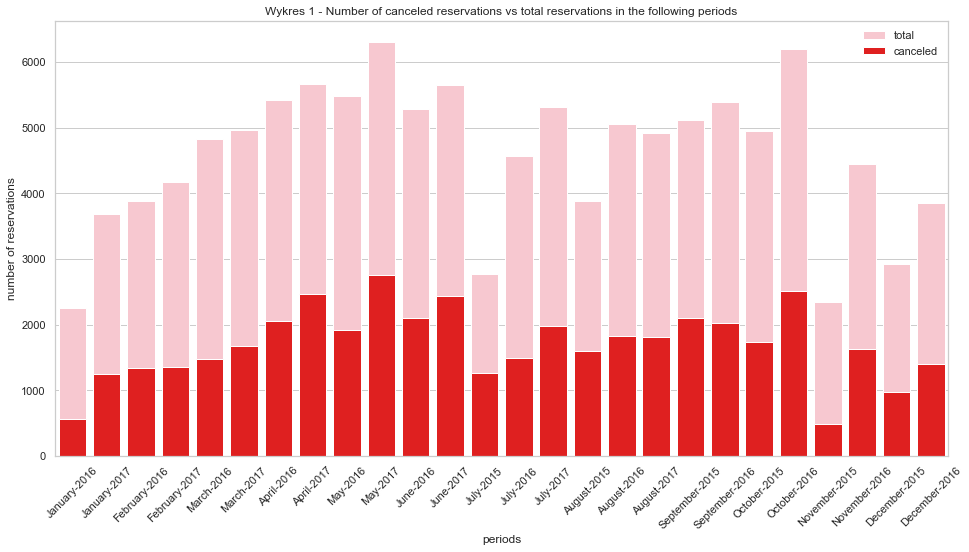

In [123]:
# Number of canceled reservations vs total reservations in the following periods
ordered_months = ["January-2016","January-2017","February-2016","February-2017", "March-2016","March-2017", 
                    "April-2016","April-2017","May-2016","May-2017", "June-2016", "June-2017",
                    "July-2015","July-2016","July-2017", "August-2015","August-2016","August-2017", "September-2015", "September-2016", 
                    "October-2015", "October-2016", "November-2015", "November-2016", "December-2015", "December-2016"]
plt.subplots(figsize=(16,8))
sns.countplot(x="month-year",data=hotel_project, color='pink', label='total', order=ordered_months)
sns.countplot(x="month-year",data=hotel_cancel, color='red', label='canceled', order=ordered_months)
plt.xticks(rotation=45)
plt.title('Wykres 1 - Number of canceled reservations vs total reservations in the following periods')
plt.xlabel('periods')
plt.ylabel('number of reservations')
plt.legend(frameon=False)

### Wykres-2

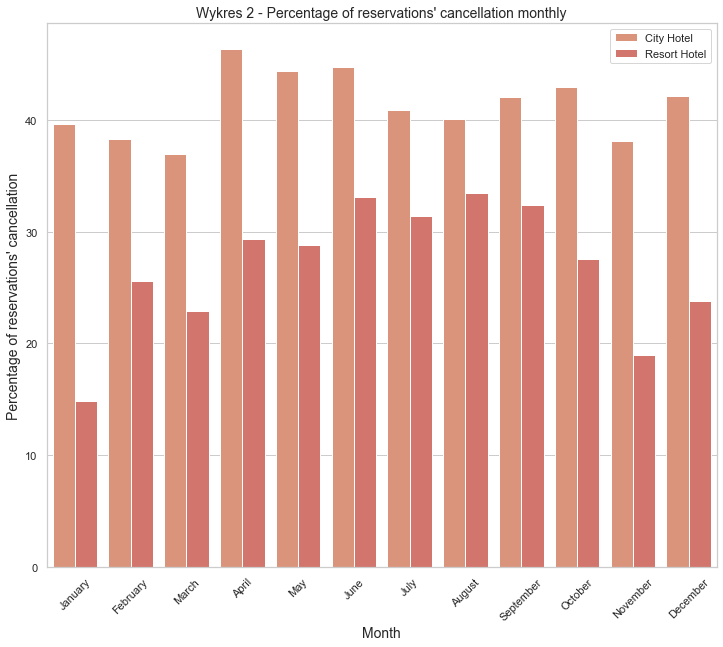

In [129]:
#Wykres Cancelation per month
reservation_booked_per_month = data_df.loc[(data_df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
reservation_canceled_per_month = data_df.loc[(data_df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()
book_per_month = data_df.loc[(data_df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cancel_per_month = data_df.loc[(data_df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(reservation_booked_per_month.index),
                                "Bookings": list(reservation_booked_per_month.values),
                                "Cancelations": list(reservation_canceled_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(book_per_month.index),
                                "Bookings": list(book_per_month.values),
                                "Cancelations": list(cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / \
    full_cancel_data["Bookings"] * 100

# order by month:

full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 10))
sns.color_palette("rocket")
sns.barplot(x="Month", y="cancel_percent", hue="Hotel", hue_order=["City Hotel", "Resort Hotel"], data=full_cancel_data, palette=color_map)
plt.title("Wykres 3 - Percentage of reservations' cancellation monthly", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Percentage of reservations' cancellation", fontsize=14)
plt.legend(loc="upper right")
plt.show()

### Wykres-3

Text(0.5, 1.0, 'Wykres 3 - Correlation Matrix')

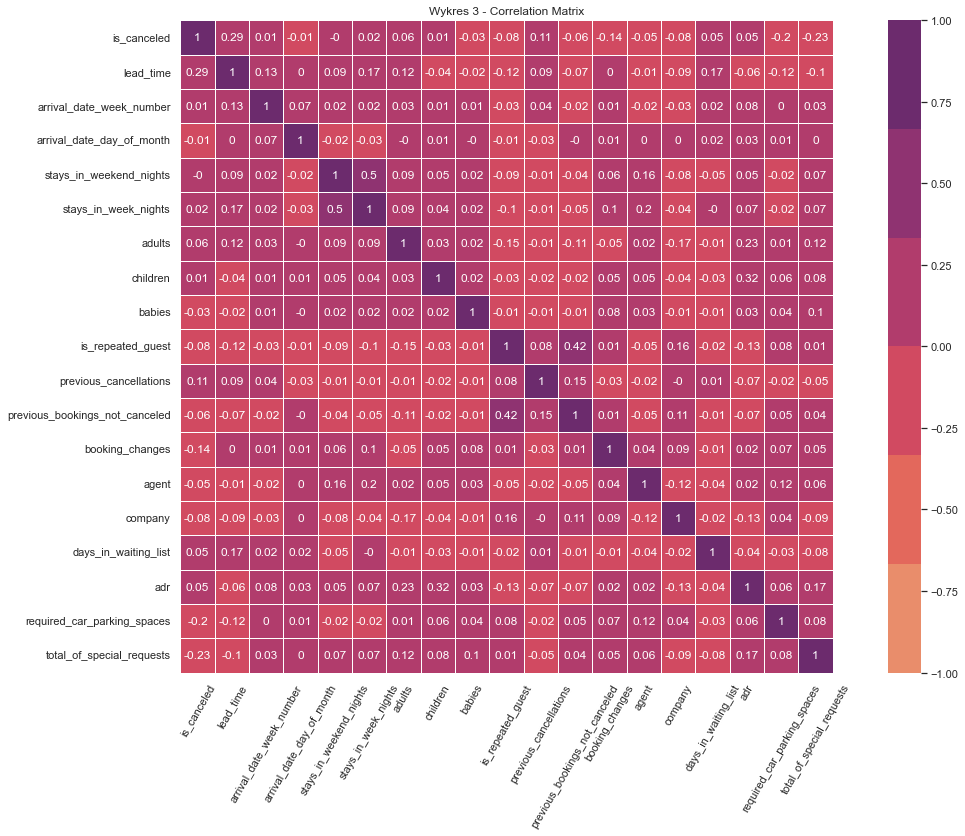

In [12]:
# Correlation Matrix
hotel_project = data_df
correlation_matrix = np.round(hotel_project.corr(), 2)
#correlation_matrix

sns.set(rc={'figure.figsize':(20,12)}) 

sns.heatmap(correlation_matrix, annot = True, cmap=color_map, vmin=-1.0, vmax=1.0, linewidths=1, square=True) 
plt.xticks(rotation=60)
plt.title('Wykres 3 - Correlation Matrix')


In [8]:
# Correlation Matrix Numeric
cancel_correllation = data_df.corr()["is_canceled"]
cancel_correllation.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

Najbardziej skorelowane kategorie wzgledem tego, czy rezerwacja została anulowana czy nie:

* lead time (czas od dokonania rezerwacji do dnia, w ktorym pobyt miał się rozpocząć),
* total special requests
* required parking spaces
* previous cancellation - informacja, czy klient dokonywał wcześniej rezerwacji,
* is repeated guests


### Wykres-4

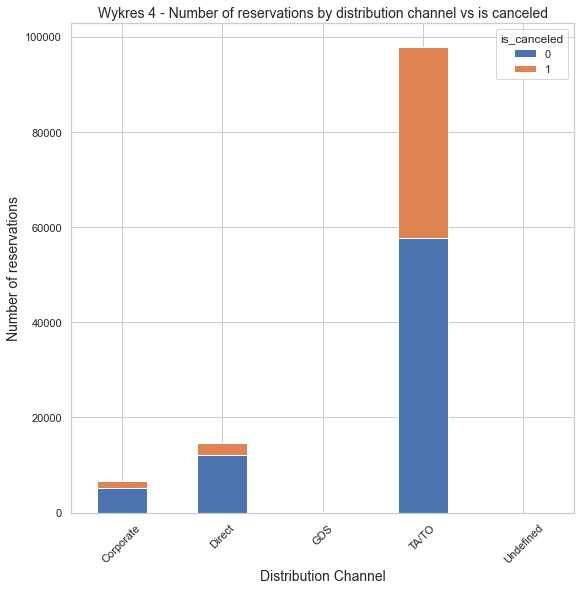

In [78]:
#distribution channel
distribution_channel_grouped = data_df[['distribution_channel', 'is_canceled' ]]

distribution_channel_grouped.groupby(['distribution_channel', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True, figsize=(9,9))

plt.title("Wykres 4 - Number of reservations by distribution channel vs is canceled", fontsize=14)
plt.xlabel("Distribution Channel", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of reservations", fontsize=14)

plt.show()



### Wykres-5

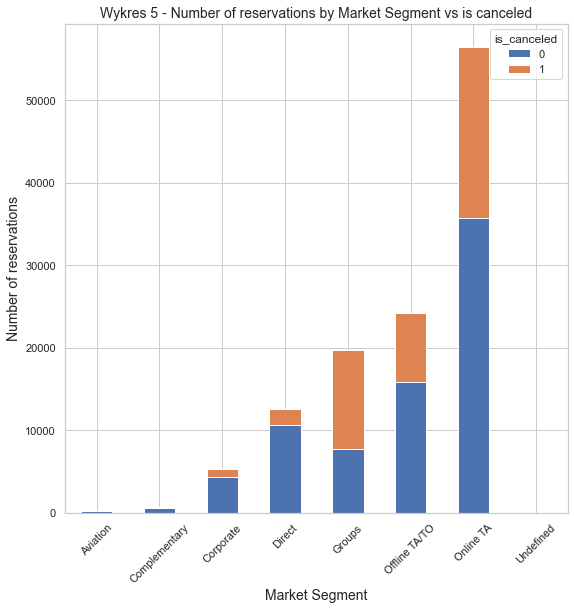

In [79]:
# Graph:  Number of reservations by Market
# .groupby(['arrival_date_month', 'arrival_date_year', 'is_canceled'], as_index=False).mean('lead_time')
market_segment_grouped = data_df[['market_segment', 'is_canceled']]

market_segment_grouped.groupby(['market_segment', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True, figsize=(9,9))

plt.title("Wykres 5 - Number of reservations by Market Segment vs is canceled", fontsize=14)
plt.xlabel("Market Segment", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of reservations", fontsize=14)

plt.show()

### Wykres-6

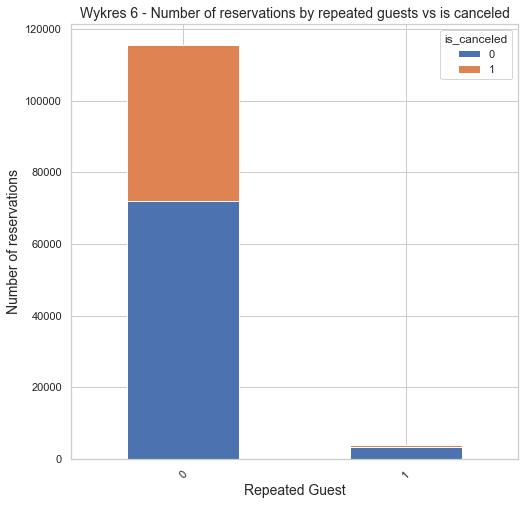

In [80]:
# Graph: Is Repeated guest vs reservations
#is repeated guest
# .groupby(['arrival_date_month', 'arrival_date_year', 'is_canceled'], as_index=False).mean('lead_time')
is_repeated_guest_grouped = data_df[['is_repeated_guest', 'is_canceled', ]]

is_repeated_guest_grouped.groupby(['is_repeated_guest', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True, figsize=(8,8))

plt.title("Wykres 6 - Number of reservations by repeated guests vs is canceled", fontsize=14)
plt.xlabel("Repeated Guest", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of reservations", fontsize=14)

plt.show()

### Wykres-7

,count of guests
deposit_type,
No Deposit,29694
Non Refund,14494
Refundable,36


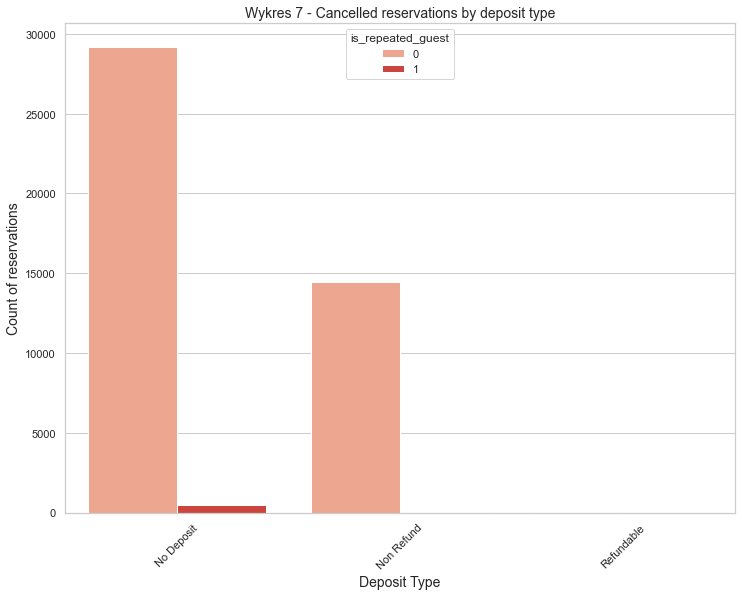

In [84]:
plt.subplots(figsize=(12,9))
plt.title("Wykres 7 - Cancelled reservations by deposit type", fontsize=14)

sns.countplot(x='deposit_type', data=hotel_cancel, hue='is_repeated_guest', palette='Reds')
plt.xlabel("Deposit Type", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Count of reservations", fontsize=14)

depozyty = hotel_cancel.groupby(['deposit_type']).agg({'is_repeated_guest':'count'})
depozyty = depozyty.rename(columns={'is_repeated_guest':'count of guests'})
depozyty

* prawie 30 tys. anulowanych rezerwacji, nie było opłacone żadną zaliczką.
* ok. 14,5 tysiąca anulowanych rezerwacji zostało wcześniej zadatkowanych. 
* Jedynie w 36 przypadkach, zaliczka ta została zwrócona dla klienta.

### Wykres-8

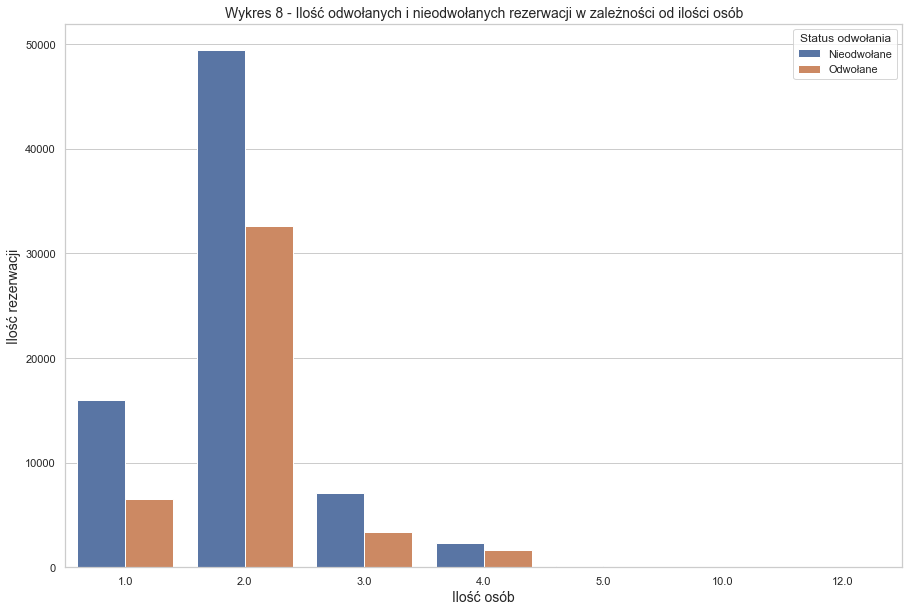

In [131]:
# Display of 2 tables
# tabela_glowna.isna().any()

tabela_wiek = tabela_glowna_cln[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek['all'] = tabela_wiek['adults'] + tabela_wiek['children'] + tabela_wiek['babies']

tabela_wiek['ilosc'] = 1

tabela_all = tabela_wiek[tabela_wiek['all']!= 0][['is_canceled','all', 'ilosc']]
tabela_all

tabela_all_grup = tabela_all.groupby(by=['is_canceled','all'])
tabela_all_grup.count()#powyzej 12 osób jest zawsze odwoływane i dla 6 osob

W = []
status_odwoalania = []
ilosc_osob = []

for key, value in tabela_all_grup:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    ilosc_osob.append(n)

rezerwacje = tabela_all_grup.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

wykres_3={
    'status_odwolania':status_odwoalania,
    'ilosc_osob':ilosc_osob,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
wykres_3
wykres_3_df = pd.DataFrame(wykres_3)
wykres_3_df
wykres_3_df_r = wykres_3_df[(wykres_3_df['ilosc_osob']!=6) & (wykres_3_df['ilosc_osob']<13)]

tab_1_o = wykres_3_df_r[wykres_3_df_r['status_odwolania'] == 0][['ilosc_osob', 'ilosc_rezerwacji']]
tab_1_o
tab_1_n = wykres_3_df_r[wykres_3_df_r['status_odwolania'] == 1][['ilosc_osob', 'ilosc_rezerwacji']]
tab_1_n

tab_a_all= pd.merge(tab_1_o, tab_1_n, on="ilosc_osob", how="left")
tab_a_all['suma'] = tab_a_all['ilosc_rezerwacji_x'] +tab_a_all['ilosc_rezerwacji_y']
tab_a_all_s = tab_a_all[['ilosc_osob', 'suma']]
tab_a_all_s
tab_a_all_s2 = pd.concat([tab_a_all_s, tab_a_all_s])
tab_a_all_s2

wykres_3_df_s = pd.merge(wykres_3_df_r, tab_a_all_s2, on="ilosc_osob", how="left")
wykres_3_dd = wykres_3_df_s.drop_duplicates(subset=["status_odwolania",'ilosc_osob']).reset_index(drop=True)
wykres_3_dd

labels=["Nieodwołane","Odwołane"]
wykres_3_dd["status_odwolania_2"] = wykres_3_dd["status_odwolania"].map(dict(zip(range(0,2), labels)))

x = wykres_3_dd['ilosc_osob'].values.tolist()
y = wykres_3_dd['ilosc_rezerwacji'].values.tolist()
# def add_value_label(x_list,y_list):
#     for i in range(len(x_list)):
#         plt.text(i, round(y_list[i], 2), round(y_list[i], 2), ha="center")

f, ax = plt.subplots(figsize=(15, 10))
wykres_1 = sns.set_theme(style="whitegrid")
wykres_1 = sns.barplot(x="ilosc_osob", y="ilosc_rezerwacji", hue="status_odwolania_2", data=wykres_3_dd)
# add_value_label(x, y)
wykres_1 = plt.title("Wykres 8 - Ilość odwołanych i nieodwołanych rezerwacji w zależności od ilości osób", fontsize=14)
wykres_1 = plt.xlabel("Ilość osób", fontsize=14)
wykres_1 = plt.ylabel("Ilość rezerwacji", fontsize=14)
wykres_1 = plt.legend(loc="upper right", title = "Status odwołania")

wykres_3_dd['procent'] = (wykres_3_dd['ilosc_rezerwacji']/wykres_3_dd['suma'])*100
z = wykres_3_dd['procent'].values.tolist()

wykres_3_dd_m = wykres_3_dd[wykres_3_dd['ilosc_osob']<10]




* Wykres przedstawia zależność pomiędzy całkowitą ilościa osób dorosłych oraz dzieci.
* Rezerwacje powyzej 5 osob sa zawsze odwolywane.

### Wykres-9

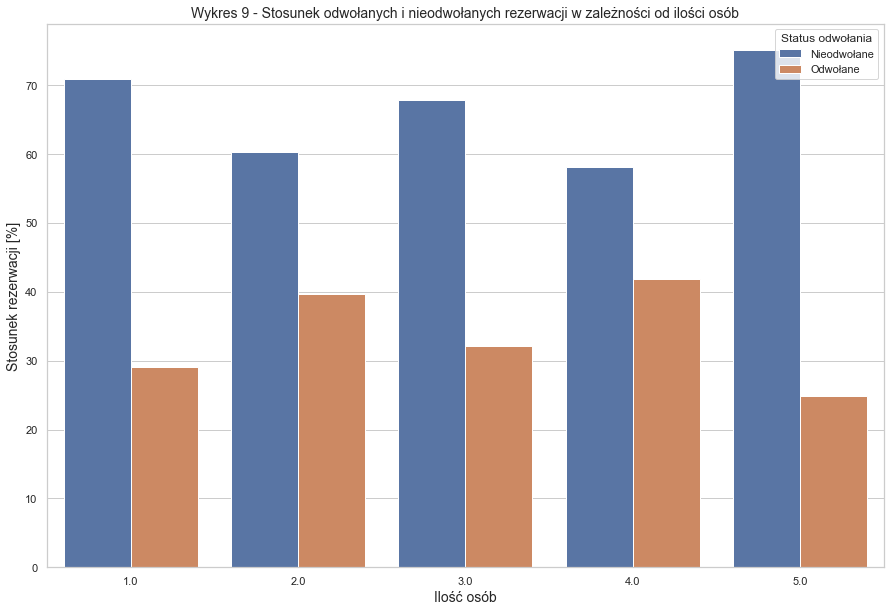

In [130]:
#Yet another chart to be generated

f, ax = plt.subplots(figsize=(15, 10))
wykres_2 = sns.set_theme(style="whitegrid")
wykres_2 = sns.barplot(x="ilosc_osob", y="procent", hue="status_odwolania_2", data=wykres_3_dd_m)
# add_value_label(x, z)
wykres_2 = plt.title("Wykres 9 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób", fontsize=14)
wykres_2 = plt.xlabel("Ilość osób", fontsize=14)
wykres_2 = plt.ylabel("Stosunek rezerwacji [%]", fontsize=14)
wykres_2 = plt.legend(loc="upper right", title = "Status odwołania")

* Wykres obrazuje procentowy stosunek rezerwacji odwolanych i nieodwolanych wśród rezerwacji z daną iloscią osób.
* ilość nieodwołanych rezerwacji mieści się w granicach zblożonych do 70% dla wszystkich przypadków. 
* najmniejsza róznica występuje wsrod rezerwacji dwu i czteroosobowych. 
* poniewaz rezerwacji dwuosobowych wystepuje najwiecej należy zrówcić szczególną uwagę na ryzyko anulowania rezerwacji w tym przypadku.

### Wykres-10

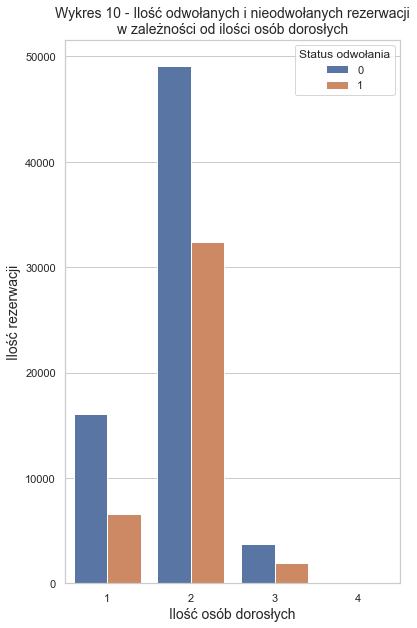

In [133]:
tabela_wiek = tabela_glowna_cln[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek
# tabela_wiek.isna().any()

#dorosli bez dzieci
dorosli = tabela_wiek[(tabela_wiek['adults']!=0) & (tabela_wiek['children']==0) & (tabela_wiek['babies']==0)][['is_canceled','adults']]
dorosli
dorosli['ilosc'] = 1
dorosli_df = dorosli[dorosli['adults'] <= 4].groupby(by=['is_canceled','adults']) #z tego widac ze powyzej 4 dorołych jest zawsze anulowne
rezerwacje = dorosli_df.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

ilosc_rezerwacji

W = []
status_odwoalania = []
ilosc_doroslych = []

for key, value in dorosli_df:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    ilosc_doroslych.append(n)

wykres_1={
    'ilosc_rezerwacji':ilosc_rezerwacji,
    'status_odwolania':status_odwoalania,
    'ilosc_doroslych':ilosc_doroslych}
wykres_1
wykres_1_df = pd.DataFrame(wykres_1)
wykres_1_df

labels=["Nieodwołane","Odwołane"]
wykres_1_df["status_odwolania_2"] = wykres_1_df["status_odwolania"].map(dict(zip(range(0,2), labels)))

f, ax = plt.subplots(figsize=(6, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="ilosc_doroslych", y="ilosc_rezerwacji", hue="status_odwolania", data=wykres_1_df)
wykres_3 = plt.title("Wykres 10 - Ilość odwołanych i nieodwołanych rezerwacji\nw zależności od ilości osób dorosłych", fontsize=14)
wykres_3 = plt.xlabel("Ilość osób dorosłych", fontsize=14)
wykres_3 = plt.ylabel("Ilość rezerwacji", fontsize=14)
wykres_3 = plt.legend(loc="upper right", title = "Status odwołania")

* Wykres przedstawia zalezność dla rezerwacji dokonanych dla samych dorosłych bez dzieci.
* w tym przypadku wszystkie rezerwacje gdzie liczba osób przekraczała 4 zostaly odwolane.
* tu również największy odsetek stanowią rezerwacje dwuoosobowe, daltego nalezy podiąć kroki,
* aby zmniejszyc ilość rezerwacji odwolanych

### Wykres-11

Text(0, 0.5, '[%] odwolanych rezerwacji')

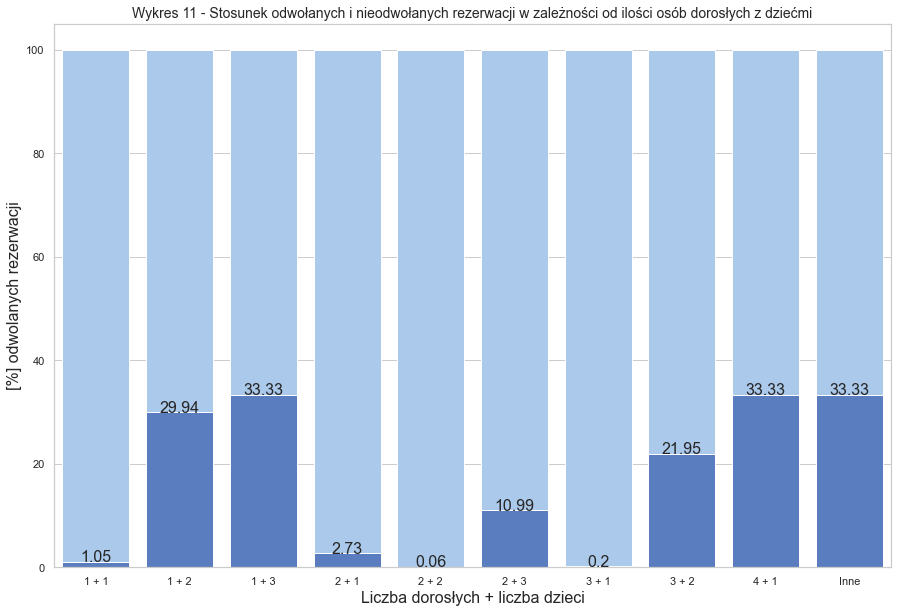

In [136]:
# # Use Image to show graph
# print('Wykres 12')
# Image(os.path.join(folder_path, "wykres_4.png"), width=900)
import warnings
warnings.filterwarnings('ignore')
tabela_wiek = tabela_glowna_cln[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
# tabela_wiek
# tabela_wiek.isna().any()

dzieci = tabela_wiek[(tabela_wiek['adults']!=0) & ((tabela_wiek['children']!=0) | (tabela_wiek['babies']!=0))]
dzieci
dzieci['ilosc'] = 1
dzieci_grup = dzieci.groupby(by=['is_canceled','adults', 'children', 'babies'])#stad widac ze powyzej 4 dorosli przyjjezdali zawsze z diecmi

W = []
ilosc_dzieci = []
ilosci_niemownat = []
status_odwoalania = []
ilosc_doroslych = []


for key, value in dzieci_grup:
    key = list(key)
    W.append(key)

for m, n, o, p in W:
    ilosc_dzieci.append(o)
    ilosci_niemownat.append(p)
    status_odwoalania.append(m)
    ilosc_doroslych.append(n)


rezerwacje = dzieci_grup.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

# print(ilosc_rezerwacji)

wykres_2={
    'status_odwolania':status_odwoalania,
    'ilosc_doroslych':ilosc_doroslych,
    'ilosc_dzieci':ilosc_dzieci,
    'ilosci_niemownat':ilosci_niemownat,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
# wykres_2
wykres_2_df = pd.DataFrame(wykres_2)
wykres_2_df['calkowita_ilosc_dzieci'] = wykres_2_df['ilosc_dzieci'] + wykres_2_df['ilosci_niemownat']
# wykres_2_df


dzieci_grup_odwolane = wykres_2_df[
    wykres_2_df['status_odwolania']==1][['status_odwolania','ilosc_doroslych','calkowita_ilosc_dzieci','ilosc_rezerwacji']]
# dzieci_grup_odwolane
dzieci_grup_nieodwolane = wykres_2_df[wykres_2_df[
    'status_odwolania']==0][['status_odwolania','ilosc_doroslych','calkowita_ilosc_dzieci','ilosc_rezerwacji']]
# dzieci_grup_nieodwolane

dzieci_grup_result = pd.concat([dzieci_grup_odwolane, dzieci_grup_nieodwolane]).reset_index(drop=True)
# dzieci_grup_result
dzieci_grup_result_grup = dzieci_grup_result.groupby(by = ['ilosc_doroslych','calkowita_ilosc_dzieci']).sum()['ilosc_rezerwacji']
# dzieci_grup_result_grup
dzieci_grup_result_grup_df = pd.DataFrame(dzieci_grup_result_grup)
# dzieci_grup_result_grup_df
dzieci_grup_result_grup_lista = dzieci_grup_result.groupby(
    by = ['ilosc_doroslych','calkowita_ilosc_dzieci']).sum()['ilosc_rezerwacji'].values.tolist()

unikatowe_wartosci = dzieci_grup_result.drop_duplicates(subset=['ilosc_doroslych','calkowita_ilosc_dzieci']).reset_index(drop=True)
# unikatowe_wartosci

unikatowe_wartosci['suma'] = None
lista_krotek =[]
for i in range(len(unikatowe_wartosci['status_odwolania'])):
    f1 = unikatowe_wartosci['ilosc_doroslych'][i]
    f2 = unikatowe_wartosci['calkowita_ilosc_dzieci'][i]
    krotka = f1, f2
    lista_krotek.append(krotka)

for el in lista_krotek:
    for element in dzieci_grup_result_grup_df.index.tolist():
        if el == element:
            j = dzieci_grup_result_grup_df.index.tolist().index(element)
            k = lista_krotek.index(el)
            unikatowe_wartosci['suma'][k] = dzieci_grup_result_grup_lista[j]


# unikatowe_wartosci

# y= dzieci_grup_result.duplicated(subset=['ilosc_doroslych','calkowita_ilosc_dzieci'])
# y

# unikatowe_wartosci
unikatowe_wartosci['kolumna_x']=None
for i in range(len(unikatowe_wartosci['status_odwolania'])):
    f1 = unikatowe_wartosci['ilosc_doroslych'][i]
    f2 = int(unikatowe_wartosci['calkowita_ilosc_dzieci'][i])
    unikatowe_wartosci['kolumna_x'][i]=f'{f1} + {f2}'
    
unikatowe_wartosci['y1'] = 100

# unikatowe_wartosci

tab_1 = unikatowe_wartosci[(unikatowe_wartosci['ilosc_doroslych'] + unikatowe_wartosci['calkowita_ilosc_dzieci']) < 6].reset_index(drop=True)
# tab_1
tab_2 = unikatowe_wartosci[(unikatowe_wartosci['ilosc_doroslych'] + unikatowe_wartosci['calkowita_ilosc_dzieci']) > 5].reset_index(drop=True)
tab_2['kolumna_x'] = 'Inne'
tab_2['suma'] = 3
# tab_2

unikatowe_wartosci2 = pd.concat([tab_1, tab_2]).reset_index(drop=True)
unikatowe_wartosci2 = unikatowe_wartosci2[unikatowe_wartosci2['status_odwolania'] != 0]

unikatowe_wartosci2['procent'] = None
for i in range(len(unikatowe_wartosci2['status_odwolania'])):
    if unikatowe_wartosci2['status_odwolania'][i] == 0:
        unikatowe_wartosci2['procent'][i] = 0
    else:
        unikatowe_wartosci2['procent']= (unikatowe_wartosci2['ilosc_rezerwacji']/unikatowe_wartosci2['suma'])*100

x = unikatowe_wartosci2["kolumna_x"].values.tolist()
y = unikatowe_wartosci2['procent'].values.tolist()
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, round(y_list[i], 2), round(y_list[i], 2), ha="center",fontsize=16)

f, ax = plt.subplots(figsize=(15, 10))

sns.set_color_codes("pastel")
sns.barplot(x="kolumna_x", y='y1', data=unikatowe_wartosci2, color="b")

sns.set_color_codes("muted")
sns.barplot(x="kolumna_x", y='procent', data=unikatowe_wartosci2, color="b")
add_value_label(x, y)

plt.title("Wykres 11 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób dorosłych z dziećmi", fontsize=14)
plt.xlabel("Liczba dorosłych + liczba dzieci", fontsize=16)
plt.ylabel("[%] odwolanych rezerwacji", fontsize=16)



* Wykres przedstawia procentowy udzial rezerwacji odwolanych ktore zostaly zlożone przez dorosłych z dziecmi.
* Istnieje zaleznosc, ze powyzej 4 doroslych zawsze przyjezdzalo z dziecmi.
* ilość rezerwacji gdzie występowalo wiecej niz 5 osób jest nieduza i te rezerwacje zostaly zebrane w kategorie inne.
* można zauwazyc ze ilość rezerwacji odwolanych rosnie wraz z ilością dzieci 
* i jest mniejsza gdy przy tej samej liczbie dzieci jest wiecej osób doroslych

### Wykres-12

Text(0.5, 1.0, 'Inne')

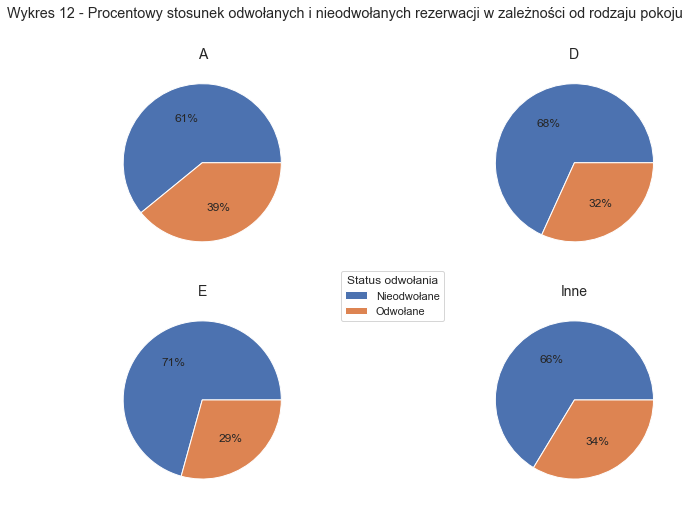

In [135]:
import warnings
warnings.filterwarnings('ignore')

tabela_pokoj = tabela_glowna_cln[['is_canceled', 'reserved_room_type']]
tabela_pokoj.loc[:,('ilosc')] = 1
tabela_pokoj.groupby(by=['is_canceled','reserved_room_type']).count()#pokoj p jest zwsze odwoływany
tabela_pokoj_g = tabela_pokoj.groupby(by=['is_canceled','reserved_room_type'])

W = []
status_odwoalania = []
typ_pokoju = []

for key, value in tabela_pokoj_g:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    typ_pokoju.append(n)

rezerwacje = tabela_pokoj_g.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

wykres_4={
    'status_odwolania':status_odwoalania,
    'typ_pokoju':typ_pokoju,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
# wykres_4
wykres_4_df = pd.DataFrame(wykres_4)
# wykres_4_df

wykres_4_df_odw = wykres_4_df[wykres_4_df['status_odwolania'] == 1]
# wykres_4_df_odw
wykres_4_df_nieodw = wykres_4_df[wykres_4_df['status_odwolania'] == 0]
# wykres_4_df_nieodw

wykres_4_caly = pd.concat([wykres_4_df_nieodw, wykres_4_df_odw]).reset_index(drop=True)
# wykres_4_caly

tab_1 = wykres_4_caly[wykres_4_caly['ilosc_rezerwacji'] > 1001].reset_index(drop=True)
# tab_1
tab_2 = wykres_4_caly[wykres_4_caly['ilosc_rezerwacji'] < 1000].reset_index(drop=True)
# tab_2

tab_3 = tab_1[(tab_1['typ_pokoju'] != 'F') & (tab_1['typ_pokoju'] != 'G') & (tab_1['typ_pokoju'] != 'P')]
# tab_3

tab_4 = tab_1[(tab_1['typ_pokoju'] == 'F') | (tab_1['typ_pokoju'] == 'G') | (tab_1['typ_pokoju'] == 'P')]
tab_4

tab_5 = pd.concat([tab_2, tab_4]).reset_index(drop=True)
# tab_5
tab_5_g = tab_5.groupby(by='status_odwolania')
tab_5_g.sum()

tab_6 = pd.DataFrame({"status_odwolania": list(tab_5_g.sum().index),
                    "typ_pokoju": "Inne", 
                    "ilosc_rezerwacji": (list(tab_5_g.sum().values.tolist())[0][0], list(tab_5_g.sum().values.tolist())[1][0])})

# tab_6

tab_7 = pd.concat([tab_3, tab_6]).reset_index(drop=True)

labels=["Nieodwołane","Odwołane"]
tab_7["status_odwolania"] = tab_7["status_odwolania"].map(dict(zip(range(0,2), labels)))
# tab_7

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( 2, 2, figsize = (12,8))
fig.subplots_adjust(left=0.2, wspace=0.6)
fig.suptitle('Wykres 12 - Procentowy stosunek odwołanych i nieodwołanych rezerwacji w zależności od rodzaju pokoju')

ax1.pie(tab_7[tab_7['typ_pokoju']=='A']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax1.set_title("A", fontsize=14)
ax1.legend(labels, loc=(1.2,-0.3), title = "Status odwołania")
ax2.pie(tab_7[tab_7['typ_pokoju']=='D']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax2.set_title("D", fontsize=14)
ax3.pie(tab_7[tab_7['typ_pokoju']=='E']['ilosc_rezerwacji'], labels = None, autopct='%.0f%%')
ax3.set_title("E", fontsize=14)
ax4.pie(tab_7[tab_7['typ_pokoju']=='Inne']['ilosc_rezerwacji'], labels =None, autopct='%.0f%%')
ax4.set_title("Inne", fontsize=14)



* Wykres przedstawia procentowy stosunek rezerwacji odwolanych i nieodwolanych.
* ilośc nieodwołanych rezerwacji pokoi danego typu miesci sie w garnicy od 60 do 70%
* przyczym najnizsza w zestwaniu jest dla pokoju typu a, który wybierany jest przez gości najczesciej.

### Wykres-13

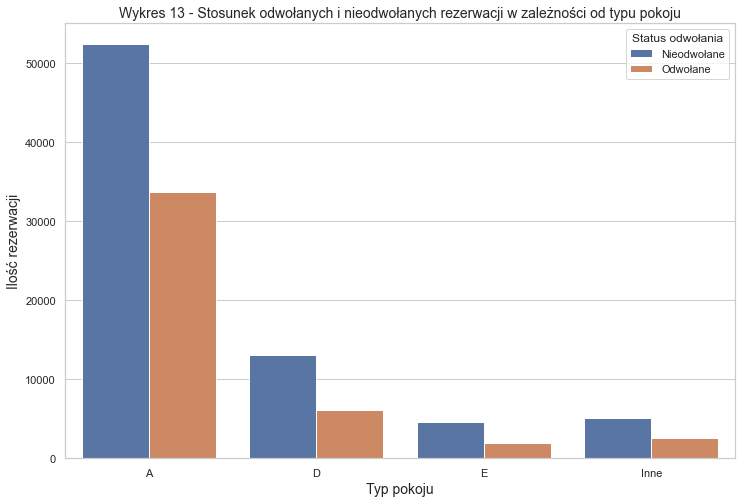

In [134]:

f, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x="typ_pokoju", y="ilosc_rezerwacji", hue="status_odwolania", data=tab_7)
# add_value_label(x, z)
plt.title("Wykres 13 - Stosunek odwołanych i nieodwołanych rezerwacji w zależności od typu pokoju", fontsize=14)
plt.xlabel("Typ pokoju", fontsize=14)
plt.ylabel("Ilość rezerwacji", fontsize=14)
plt.legend(loc="upper right", title = "Status odwołania")

* Wykres przedstawia zależności ilości rezerwacji od typu pokoju z podziałem na rezerwacje odwolane i nieodwolane.
* Największe ilościa rezerwacji zostały zaobserwowane w przypadku pokojów typu A i D
* Pokoje typu B,C,F,G,H,L,P były znacznie mniej popularne i zostały zawarte w typie 'Inne'

#### Funkcja określająca ryzyko anulowania rezerwacji

* Interpretacja wyników
    * Dla wyników dla poziomu poniżej 30% - małe ryzyko - low risk
    * Dla wyników dla poziomu poniżej 50% i powyżej 30% - średnie ryzyko - medium risk
    * Dla wyników dla poziomu powyżej 50% - duże ryzyko - big risk 
    

* Test Cases 
    * Big - 304 2 0 16
    * Medium - 435 2 0 2

In [19]:
# Starting function
from cProfile import label
from tkinter import *
from PIL import ImageTk, Image
from itertools import groupby
import os
import pandas as pd
import numpy as np
root = Tk()
root.title('Booking App')
root.geometry("400x400")
root.grid_columnconfigure((0, 1), weight=1)
# number_of_carplaces.pack()
# submitButton.pack()
def get_args():
    global number_of_special_requests_input, lead_time_input, parking_spaces_input, booking_changes_input
    number_of_special_requests_input = special_requests.get()
    lead_time_input = lead_time.get()
    parking_spaces_input = number_of_carplaces.get()
    booking_changes_input = booking_changes.get()
    check_fields()
    special_requests_calculation()
    lead_time_calculation()
    parking_spaces_calculation()
    booking_changes_calculation()
    calculate_risk(lead_time_percentage, special_request_percentage,
                   parking_spaces_percentage, booking_changes_percentage)
    # print_per()
def print_per():
    print(lead_time_percentage)
    print(special_request_percentage)
    print(parking_spaces_percentage)
    print(booking_changes_percentage)
def check_fields():
    if lead_time.get():
        pass
    else:
        # the mandatory field is empty
        print("Lead time data missing")
        lead_time.focus_set()
    if special_requests.get():
        pass
    else:
        # the mandatory field is empty
        print("Special requests data missing")
        special_requests.focus_set()
    if number_of_carplaces.get():
        pass
    else:
        # the mandatory field is empty
        print("Number of parking spaces data missing")
        number_of_carplaces.focus_set()
    if booking_changes.get():
        pass
    else:
        # the mandatory field is empty
        print("Booking changes data missing")
        booking_changes.focus_set()
def calculate_risk(lead_time, special_requests, parking_spaces, booking_changes):
    risk = lead_time + special_requests + parking_spaces + booking_changes
    # print(f'risk: {risk}')
    if risk <= 30:
        risk_msg = f'Small risk of cancelation at {risk}%'
    elif risk <= 50:
        risk_msg = f'Medium risk of cancelation at {risk}%'
    else:
        risk_msg = f'Big risk of cancelation at {risk}%'
    risk_label = Label(root, text=risk_msg)
    risk_label.grid(row=8, column=1)
def lead_time_calculation():
    global lead_time_percentage
    # data_filename = 'hotel_bookings_analysis.csv'
    # data_path = os.path.join(os.path.abspath(
    #     '../Project_Python/data'), data_filename)
    data_df = pd.read_csv(data_path)
    total_of_lead_time_df = data_df[[
        'lead_time', 'is_canceled']]
    ##
    total_of_lead_time_df = total_of_lead_time_df.loc[(
        (total_of_lead_time_df['lead_time'] == int(lead_time_input)))]
    total_of_lead_time_count = len(total_of_lead_time_df)
    if total_of_lead_time_count == 0:
        lead_time_percentage = 0
        return lead_time_percentage
    ##
    total_of_lead_time_canceled_df = total_of_lead_time_df.loc[(
        (total_of_lead_time_df['lead_time'] == int(lead_time_input)) & (total_of_lead_time_df['is_canceled'] == 1))]
    total_of_lead_time_canceled_count = len(
        total_of_lead_time_canceled_df)
    ##
    lead_time_percentage = round(total_of_lead_time_canceled_count /
                                 total_of_lead_time_count * 0.25 * 100)
    # return
    return lead_time_percentage
def special_requests_calculation():
    global special_request_percentage
    # data_filename = 'hotel_bookings_analysis.csv'
    # data_path = os.path.join(os.path.abspath(
    #     '../../python/data'), data_filename)
    data_df = pd.read_csv(data_path)
    total_of_special_request_df = data_df[[
        'total_of_special_requests', 'is_canceled']]
    ##
    total_of_special_requests_df = total_of_special_request_df.loc[(
        (total_of_special_request_df['total_of_special_requests'] == int(number_of_special_requests_input)))]
    total_of_special_requests_count = len(total_of_special_requests_df)
    if total_of_special_requests_count == 0:
        special_request_percentage = 0
        return special_request_percentage
    ##
    total_of_special_requests_canceled_df = total_of_special_request_df.loc[(
        (total_of_special_request_df['total_of_special_requests'] == int(number_of_special_requests_input)) & (total_of_special_request_df['is_canceled'] == 1))]
    total_of_special_requests_canceled_count = len(
        total_of_special_requests_canceled_df)
    ##
    special_request_percentage = round(total_of_special_requests_canceled_count /
                                       total_of_special_requests_count * 0.25 * 100)
    # return
    return special_request_percentage
def parking_spaces_calculation():
    global parking_spaces_percentage
    # data_filename = 'hotel_bookings_analysis.csv'
    # data_path = os.path.join(os.path.abspath(
    #     '../../python/data'), data_filename)
    data_df = pd.read_csv(data_path)
    total_of_parking_spaces_df = data_df[[
        'required_car_parking_spaces', 'is_canceled']]
    ##
    total_of_parking_spaces_df = total_of_parking_spaces_df.loc[(
        (total_of_parking_spaces_df['required_car_parking_spaces'] == int(parking_spaces_input)))]
    total_of_parking_spaces_count = len(total_of_parking_spaces_df)
    if total_of_parking_spaces_count == 0:
        parking_spaces_percentage = 0
        return parking_spaces_percentage
    ##
    total_of_parking_spaces_canceled_df = total_of_parking_spaces_df.loc[(
        (total_of_parking_spaces_df['required_car_parking_spaces'] == int(parking_spaces_input)) & (total_of_parking_spaces_df['is_canceled'] == 1))]
    total_of_parking_spaces_canceled_count = len(
        total_of_parking_spaces_canceled_df)
    ##
    parking_spaces_percentage = round(total_of_parking_spaces_canceled_count /
                                      total_of_parking_spaces_count * 0.25 * 100)
    # return
    return parking_spaces_percentage
def booking_changes_calculation():
    global booking_changes_percentage
    # data_filename = 'hotel_bookings_analysis.csv'
    # data_path = os.path.join(os.path.abspath(
    #     '../../python/data'), data_filename)
    data_df = pd.read_csv(data_path)
    total_of_booking_changes_df = data_df[[
        'booking_changes', 'is_canceled']]
    ##
    total_of_booking_changes_df = total_of_booking_changes_df.loc[(
        (total_of_booking_changes_df['booking_changes'] == int(booking_changes_input)))]
    total_of_booking_changes_count = len(total_of_booking_changes_df)
    if total_of_booking_changes_count == 0:
        booking_changes_percentage = 0
        return booking_changes_percentage
    ##
    total_of_booking_changes_canceled_df = total_of_booking_changes_df.loc[(
        (total_of_booking_changes_df['booking_changes'] == int(booking_changes_input)) & (total_of_booking_changes_df['is_canceled'] == 1))]
    total_of_booking_changes_canceled_count = len(
        total_of_booking_changes_canceled_df)
    ##
    booking_changes_percentage = round(total_of_booking_changes_canceled_count /
                                       total_of_booking_changes_count * 0.25 * 100)
    # return
    return booking_changes_percentage
number_of_carplaces_label = Label(root, text='Required parking spaces:')
number_of_carplaces = Entry(root)
lead_time_label = Label(root, text='Lead time:')
lead_time = Entry(root)
special_requests_label = Label(root, text='Number of special requests:')
special_requests = Entry(root)
booking_changes_label = Label(root, text='Number of booking changes:')
booking_changes = Entry(root)
# submitButton = Button(root, text="Check rating",
#                       command=lambda: [check_cancelation_rate(), special_requests_calculation()])
submitButton = Button(root, text="Check risk",
                      command=get_args)
lead_time_label.grid(row=3, column=0)
lead_time.grid(row=3, column=1)
special_requests_label.grid(row=4, column=0)
special_requests.grid(row=4, column=1)
number_of_carplaces_label.grid(row=5, column=0)
number_of_carplaces.grid(row=5, column=1,)
booking_changes_label.grid(row=6, column=0)
booking_changes.grid(row=6, column=1)
submitButton.grid(row=7, column=1)
root.mainloop()